In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [8]:
import warnings
warnings.filterwarnings('ignore')

## Step 1 : Reading and understanding the data
- Read the csv file into the dataframe
- Check the shape of the data
- Check the info() to see if there are any missing values
- Describe() the dataframe to check if there are any skewness or pattern
- Check if there is any null value in the columns

In [9]:
advertisingDF = pd.read_csv("advertising.csv")

In [10]:
advertisingDF.shape

(200, 4)

In [11]:
advertisingDF.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [12]:
advertisingDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [13]:
advertisingDF.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [14]:
advertisingDF.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## Step 2 : Visualise the data

<Axes: xlabel='TV', ylabel='Sales'>

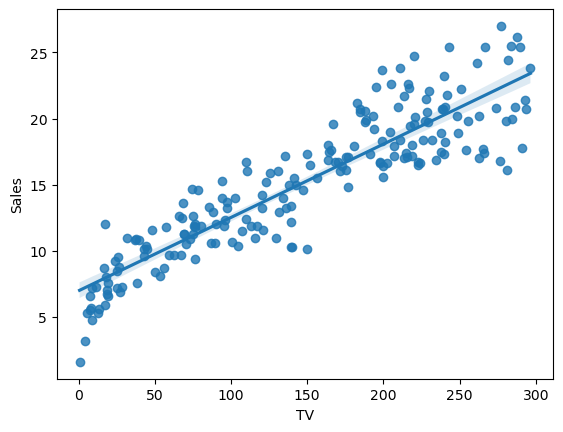

In [17]:
sns.regplot(x='TV',y='Sales',data=advertisingDF)

<Axes: xlabel='Radio', ylabel='Sales'>

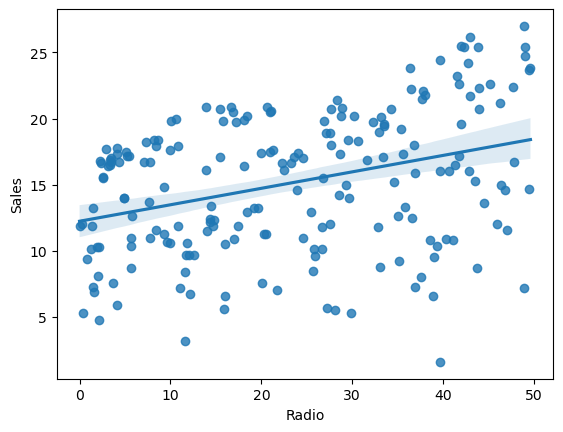

In [18]:
sns.regplot(x='Radio', y='Sales', data=advertisingDF)

<Axes: xlabel='Newspaper', ylabel='Sales'>

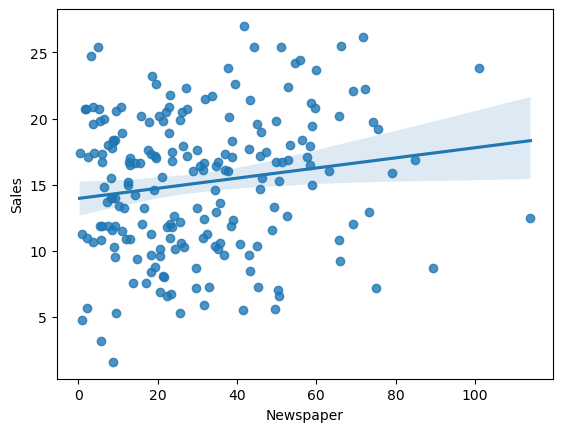

In [19]:
sns.regplot(x='Newspaper',y='Sales',data=advertisingDF)


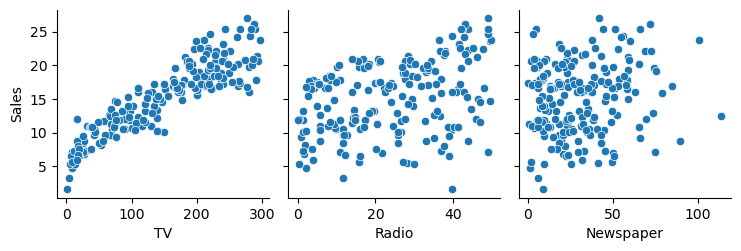

In [22]:
sns.pairplot(data=advertisingDF, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales')

<Axes: >

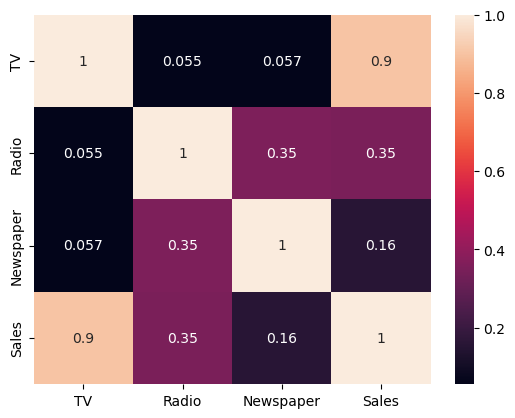

In [23]:
sns.heatmap(advertisingDF.corr(), annot=True)

## Step 3 : Performing Simple linear regression 
- Create X and y
- Create train and test sets (70-30, 80-20)
- Train your model on the training set (i.e learn the coefficient)
- Evaluate the model

In [26]:
#Create X and y

X = advertisingDF['TV']
y = advertisingDF['Sales']

In [30]:
#Create train and test sets (70-30, 80-20)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.70, random_state=100)

In [31]:
X_train.shape

(140,)

In [32]:
X_test.shape

(60,)

In [33]:
Y_train.shape

(140,)

In [34]:
Y_test.shape

(60,)

In [35]:
X_train.head()

74     213.4
3      151.5
185    205.0
26     142.9
90     134.3
Name: TV, dtype: float64

In [36]:
Y_train.head()

74     17.0
3      16.5
185    22.6
26     15.0
90     14.0
Name: Sales, dtype: float64

In [38]:
# By default statsmodels doesn't include the intercept. 

X_train_sm = sm.add_constant(X_train)
X_train_sm.head()

,const,TV
74,1.0,213.4
3,1.0,151.5
185,1.0,205.0
26,1.0,142.9
90,1.0,134.3


In [41]:
# Fitting the model 

lr = sm.OLS(Y_train, X_train_sm)
lr_model = lr.fit()
lr_model.params

const    6.948683
TV       0.054546
dtype: float64

In [42]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           1.52e-52
Time:                        00:31:05   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.000       6.188       7.709
TV             0.0545      0.002     24.722      0.000       0.050       0.059
==============================================================================
Omnibus:                        0.027   Durbin-Watson:                   2.196
Prob(Omnibus):                  0.987   Jarque-Bera (JB):                0.150
Skew:                          -0.006   Prob(JB):                        0.928
Kurtosis:                       2.840   Cond. No.                         328.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Understanding from above summary 
- 81.6% variance is explained by model (R-squared value). 81.6% of variance is 'Sales' is explained by 'TV'
- P-value is 0.00
- Co-eff for TV is 0.0545 

In [47]:
y_train_pred = lr_model.predict(X_train_sm)

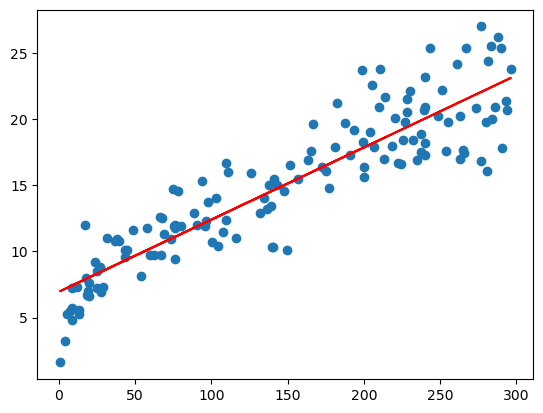

In [48]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, y_train_pred, 'r')
plt.show()

## Residual Analysis

In [50]:
res = Y_train - y_train_pred

Text(0.5, 1.0, 'Residual plot')

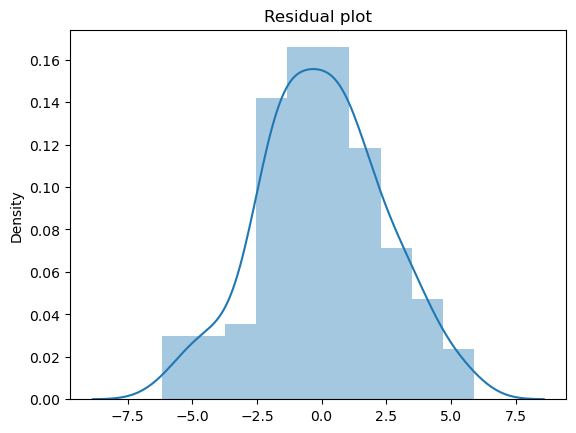

In [51]:
plt.figure()
sns.distplot(res)
plt.title("Residual plot")

#### The residual is ploteed with mean 0 and we can conclude it is normally distributed

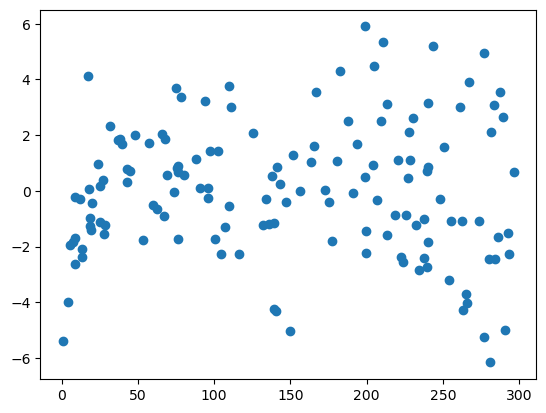

In [52]:
plt.scatter(X_train, res)
plt.show()

#### Look for the patterns and we should not be able to identify any patterns.

## Step 4 : Prediction and Evaluation on test set
- Make predictions on test set
- Evaluate the mode, r-squared on test set


In [53]:
X_test_sm = sm.add_constant(X_test)

In [54]:
X_test_sm.head()

,const,TV
126,1.0,7.8
104,1.0,238.2
99,1.0,135.2
92,1.0,217.7
111,1.0,241.7


In [60]:
y_test_pred = lr_model.predict(X_test_sm)

In [63]:
help(r2_score)

Help on function r2_score in module sklearn.metrics._regression:

r2_score(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', force_finite=True)
    :math:`R^2` (coefficient of determination) regression score function.
    
    Best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). In the general case when the true y is
    non-constant, a constant model that always predicts the average y
    disregarding the input features would get a :math:`R^2` score of 0.0.
    
    In the particular case when ``y_true`` is constant, the :math:`R^2` score
    is not finite: it is either ``NaN`` (perfect predictions) or ``-Inf``
    (imperfect predictions). To prevent such non-finite numbers to pollute
    higher-level experiments such as a grid search cross-validation, by default
    these cases are replaced with 1.0 (perfect predictions) or 0.0 (imperfect
    predictions) respectively. You can set ``force_finite`` to ``False`` to
    

In [64]:
r2 = r2_score(y_true = Y_test , y_pred = y_test_pred)
r2

0.792103160124566

#### R^2 for the test data is 79% which is closer to the training dataset i.e. 81%
#### Anything under 5% difference is good

In [65]:
mean_squared_error(y_true = Y_test , y_pred = y_test_pred)

4.077556371826953

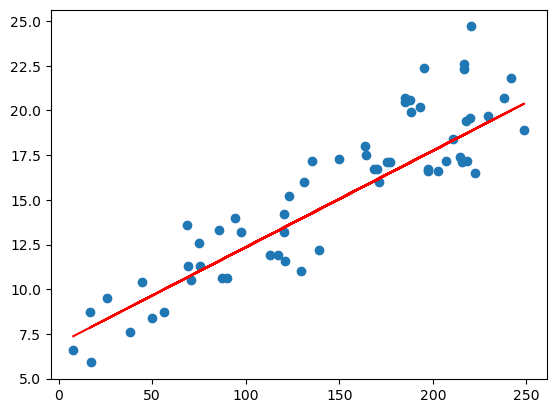

In [67]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()

# Linear regression using SKLEARN

In [68]:
#Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.70, random_state=100)

In [70]:
X_train.shape

(140,)

In [73]:
X_train_lm = X_train.values.reshape(-1,1)
X_test_lm = X_test.values.reshape(-1,1)

In [81]:
print(X_train_lm.shape)
print(X_test_lm.shape)
print(y_train.shape)
print(y_test.shape)

(140, 1)
(60, 1)
(140,)
(60,)


In [83]:
from sklearn.linear_model import LinearRegression

# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

# Fit the model using lr.fit()
lm.fit(X_train_lm, y_train)

LinearRegression()

In [84]:
print(lm.intercept_)
print(lm.coef_)

6.948683200001357
[0.05454575]


In [87]:
#make the prediction
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

In [91]:
#calculte R^2 on train data
r2 = r2_score(y_true = y_train , y_pred = y_train_pred)
r2

0.8157933136480389

In [92]:
#calculte R^2 on test data
r2 = r2_score(y_true = y_test , y_pred = y_test_pred)
r2

0.7921031601245662